In [199]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

Mergning all 12 months dataset

Finding Names Of All Files Using os.listdir

In [14]:
files = [file for file in os.listdir('./Sales_Data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [17]:
merged_csv = pd.concat([pd.read_csv('./Sales_Data/'+file) for file in files])
merged_csv.to_csv("merged_2019_sales.csv", index=False, encoding='utf-8-sig')

In [18]:
df_merged = pd.read_csv('merged_2019_sales.csv')

In [155]:
df_merged.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001


Create More Colums To Simplify

In [31]:
#Month Col
#df_merged['Order Date'][0].split('/')[0]
df_merged['Month'] = df_merged['Order Date'].str[0:2]

Taking Out NAN and Or 

In [45]:
df_merged.dropna(subset = ["Order ID"],inplace=True)

In [52]:
#cleaning months column
df_merged = df_merged[df_merged['Order Date'].str[0:2] != 'Or']

In [53]:
#convert month column type to int
df_merged['Month'] = df_merged['Month'].astype('int32')

Month Col Cleaned and type changed to int

Add A Sales Column after changing type of quantity ordered and Price of each to int

In [60]:
df_merged['Quantity Ordered'] = pd.to_numeric(df_merged['Quantity Ordered'])
df_merged['Price Each'] = pd.to_numeric(df_merged['Price Each'])

In [61]:
df_merged['Sales'] = df_merged['Quantity Ordered'] * df_merged['Price Each']

Maximum Sale In Which Month

In [85]:
Sales_sum = df_merged.groupby('Month').sum()
#This will give the row where the maximum sale happened in a day
#df_merged.loc[df_merged['Sales'].idxmax()]

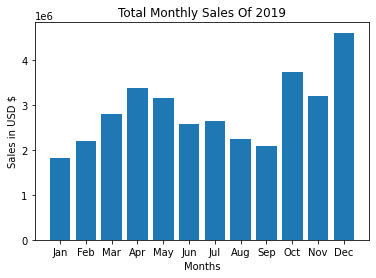

In [87]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct'
         ,'Nov','Dec']
plt.bar(months,Sales_sum['Sales'])
plt.ylabel('Sales in USD $')
plt.xlabel('Months')
plt.title('Total Monthly Sales Of 2019')
plt.show()

What City Had The Highest Number Of Sales
(Add a city column)
(!There might be 2 cities with the same name, so do it with states)

In [106]:
#df_merged['Purchase Address'][0].split(',')[0]
df_merged['City'] = df_merged['Purchase Address'].apply(lambda x:x.split(',')[1])

' TX 75001'

In [154]:
Sales_sum_City = df_merged.groupby('City').sum()

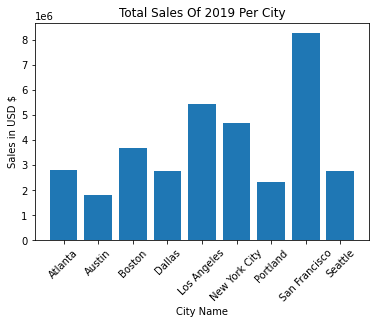

In [102]:
cities = ['Atlanta','Austin','Boston','Dallas','Los Angeles'
          ,'New York City','Portland','San Francisco','Seattle']
plt.bar(cities,Sales_sum_City['Sales'])
plt.ylabel('Sales in USD $')
plt.xlabel('City Name')
plt.title('Total Sales Of 2019 Per City')
plt.xticks(rotation=45)
plt.show()

What state had the highest sales

In [107]:
df_merged['State'] = df_merged['Purchase Address'].apply(lambda x:x.split(',')[2])

In [117]:
Sales_sum_State = df_merged.groupby('State').sum()

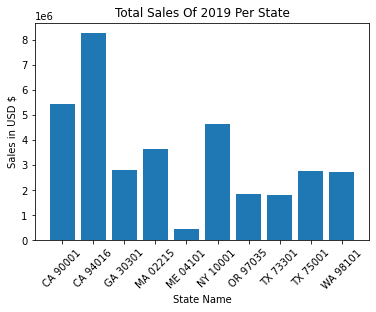

In [118]:
states = ['CA 90001','CA 94016','GA 30301','MA 02215'
          ,'ME 04101','NY 10001','OR 97035','TX 73301'
          ,'TX 75001','WA 98101']

plt.bar(states,Sales_sum_State['Sales'])
plt.ylabel('Sales in USD $')
plt.xlabel('State Name')
plt.title('Total Sales Of 2019 Per State')
plt.xticks(rotation=45)
plt.show()

Which item had the most quantity sold?

In [136]:
#total 19 different items
df_merged['Product'].unique()
items = ['20in Monitor','27in 4K Gaming Monitor','27in FHD Monitor','34in Ultrawide Monitor','AA Batteries (4-pack)'
,'AAA Batteries (4-pack)','Apple Airpods Headphones','Bose SoundSport Headphones',
'Flatscreen TV','Google Phone','LG Dryer','LG Washing Machine','Lightning Charging Cable',
'Macbook Pro Laptop','ThinkPad Laptop','USB-C Charging Cable','Vareebadd Phone','Wired Headphones','iPhone']

In [132]:
Sales_sum_item = df_merged.groupby('Product').sum()

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
20in Monitor,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43
Flatscreen TV,4819,1440000.00,34224,1445700.00


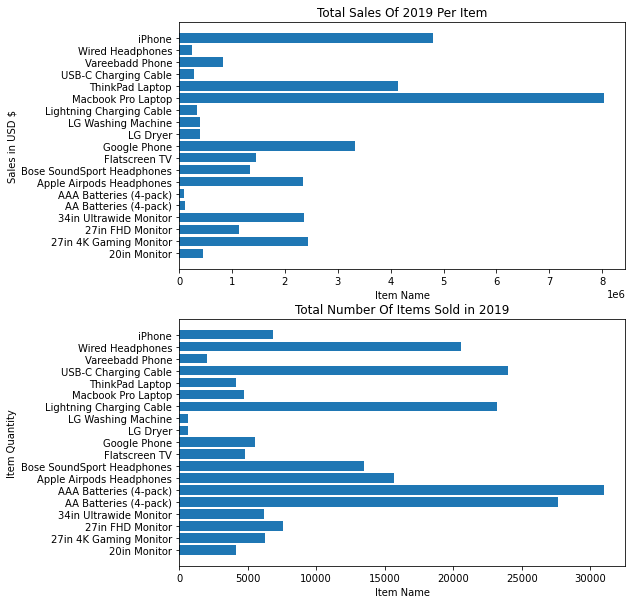

In [152]:
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.ylabel('Sales in USD $')
plt.xlabel('Item Name')
plt.title('Total Sales Of 2019 Per Item')
plt.barh(items,Sales_sum_item['Sales'])
plt.subplot(2,1,2)
plt.ylabel('Item Quantity')
plt.xlabel('Item Name')
plt.title('Total Number Of Items Sold in 2019')
plt.barh(items,Sales_sum_item['Quantity Ordered'])

plt.show()

Time of the day where Orders increase
(Some New Columns)

In [156]:
df_merged['Order Date'] = pd.to_datetime(df_merged['Order Date'])

In [165]:
df_merged['Hour'] = df_merged['Order Date'].dt.hour

In [169]:
Sales_sum_Hour = df_merged.groupby('Hour').sum()

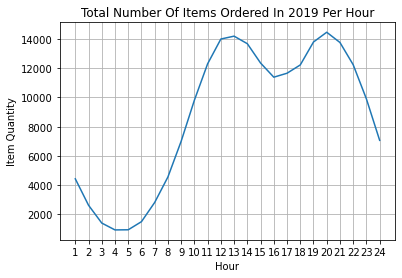

In [177]:
hours = range(1,25)
plt.plot(hours,Sales_sum_Hour['Quantity Ordered'])
plt.ylabel('Item Quantity')
plt.xlabel('Hour')
plt.title('Total Number Of Items Ordered In 2019 Per Hour')
plt.xticks(hours)
plt.grid()
plt.show()

From this we can see that we should place advertisments when the time is b/w 12-15 AND 18-23

What products are most often sold together in a pair of 2!!?

In [183]:
#df_merged.groupby('Order ID').sum()
#185950 Orders
#178437 unique Order ID's
#Meaning Some people ordered multiple items

In [186]:
#We got all order ID's which have duplicates
df_temp = df_merged[df_merged['Order ID'].duplicated(keep=False)]

In [188]:
#df_temp.to_csv("merged_Duplicate_orderIDs.csv", index=False, encoding='utf-8-sig')
df_temp['Group'] = df_temp.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\Muneeb\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [192]:
df_temp = df_temp[['Order ID','Group']].drop_duplicates()

In [202]:
#df_temp.groupby('Group').count()
#this might not combine some values that are the same but in different order

count = Counter()
for row in df_temp['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [213]:
for key,value in count.most_common(10):
    print(key[0]+' || '+key[1] +' || ',value)

iPhone || Lightning Charging Cable ||  1005
Google Phone || USB-C Charging Cable ||  987
iPhone || Wired Headphones ||  447
Google Phone || Wired Headphones ||  414
Vareebadd Phone || USB-C Charging Cable ||  361
iPhone || Apple Airpods Headphones ||  360
Google Phone || Bose SoundSport Headphones ||  220
USB-C Charging Cable || Wired Headphones ||  160
Vareebadd Phone || Wired Headphones ||  143
Lightning Charging Cable || Wired Headphones ||  92


What Product Sold The Most? // Shown Visually in the graph above
('Total Number Of Items Sold in 2019')

In [215]:
df_temp2 = df_merged.groupby('Product').sum()

In [221]:
print(df_temp2['Quantity Ordered'].idxmax(),'=>',df_temp2['Quantity Ordered'].max())

AAA Batteries (4-pack) => 31017


#something something

In [238]:
prices = df_merged.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\Muneeb\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
C:\Users\Muneeb\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


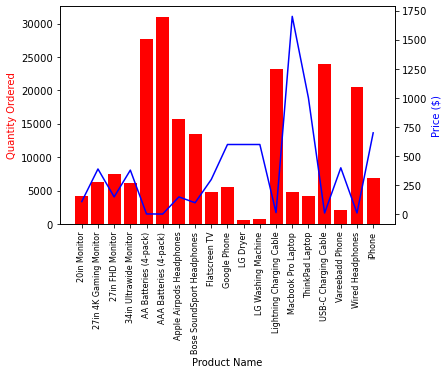

In [244]:
product_group = df_merged.groupby('Product')
keys = [pair for pair, df in product_group]
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = df_merged.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='r')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='r')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()